In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

## Exemple introductif

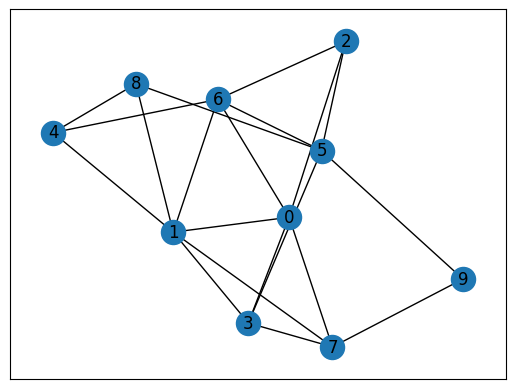

In [3]:
# Génération d’un graphe aléatoire à 10 sommets et 20 arêtes
G = nx.gnm_random_graph(10,20)

# Visualisation du graphe
nx.draw_networkx(G)
plt.show()

(A ne pas faire, sauf sur machine perso avec package pygraphviz correctement installé)
Ecrivez du code python pour charger le graphe au format dot de l’exercice 1 et le visualiser.

In [ ]:
...

## Graphe des diviseurs

Ecrivez une fonction python qui créé et retourne le graphe orienté des diviseurs sur l’ensemble des entiers compris entre 2 et n (n passé en paramètre) possédant : un sommet pour chaque entier entre 2 et n ; un arc de l’entier x vers l’entier y si y est un multiple de x. 
-	https://networkx.org/documentation/stable/reference/introduction.html#networkx-basics

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def diviseurs(n):
    G = nx.DiGraph()  # Création d'un graphe orienté
    for i in range(2, n+1):
        G.add_node(i)  # Ajout des sommets pour chaque entier entre 2 et n
        for j in range(2, i):  # Vérification des multiples de i
            if i % j == 0:
                G.add_edge(j, i)  # Ajout d'un arc de j vers i si j est un diviseur de i
    return G



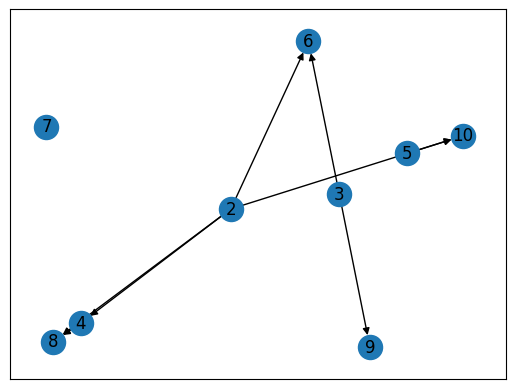

In [5]:
G = diviseurs(10)
nx.draw_networkx(G)
plt.show()

Que peut-on dire d'un sommet dont le degré entrant est nul ? D'un sommet dont le degré sortant est nul ?

Réponse : 

Mettre en place un mécanisme de coloriage des arcs et nœuds d’un graphe. Vous pouvez pour cela faire un premier dessin avec draw_networkx puis redessiner les arêtes par-dessus (à la même position, cf second paramètre de la fonction draw_networkx_edges). Testez pour obtenir quelque chose comme sur la figure 2 (les arêtes sont en bleu, de largeur 8 et avec une opacité de 0,5).
-	https://networkx.org/documentation/stable/reference/drawing.html

Si vous ne l'avez pas fait avant, écrivez une fonction mydraw qui prendre un graphe et une liste d'arêtes de ce graphe et dessine le tout en mettant en avant les arêtes.

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def mydraw(G, highlighted_edges):
    # Détermine la disposition des nœuds dans le dessin
    pos = nx.spring_layout(G)

    # Dessine le graphe de base
    nx.draw(G, pos=pos, with_labels=True)

    # Dessine les arêtes spécifiées avec une couleur différente
    nx.draw_networkx_edges(G, pos=pos, edgelist=highlighted_edges, edge_color='red', width=2)

    # Affiche le graphe
    plt.title("Graphe avec les arêtes mises en avant")
    plt.show()




## Parcours en largeur

Implémenter l’algorithme de parcours en largeur d’un graphe qui prend un graphe et un sommet de départ et retourne la liste des arêtes (ou arcs) de l’arbre du parcours en largeur partant du sommet de départ.
-	On supposera que le graphe est (fortement) connexe pour n’implémenter que la boucle interne du BFS.
-	Vous pouvez utiliser un ensemble de sommets visités plutôt que de colorer les sommets durant le parcours. Ainsi si un sommet est dans l’ensemble il a déjà été visité sinon il ne l’a pas été.

In [13]:
import queue
import networkx as nx
import matplotlib.pyplot as plt

def graph_to_adjacency_dict(G):
    adjacency_dict = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        adjacency_dict[node] = neighbors
    return adjacency_dict

def bfs(G, source):
    q = queue.Queue()  # file pour stocker les sommets durant la visite
    visited = {source}  # ensemble des sommets déjà visités
    edges = []  # liste des arêtes de l'arbre de parcours en largeur
    
    q.put(source)  # ajoute le sommet source à la file

    while not q.empty():
        node = q.get()  # récupère le sommet en tête de file
        
        for neighbor in G[node]:  # parcourt les voisins du sommet actuel
            if neighbor not in visited:
                visited.add(neighbor)  # marque le voisin comme visité
                edges.append((node, neighbor))  # ajoute l'arête à la liste
                q.put(neighbor)  # ajoute le voisin à la file
    
    return edges


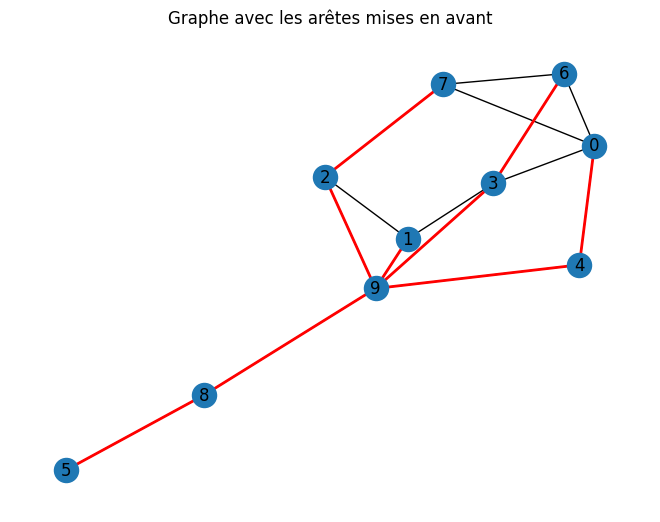

In [14]:
G = nx.gnm_random_graph(10,15)
edges = bfs(G,5)
mydraw(G, edges)

Refaire la même chose pour le parcours en profondeur

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs(graph, start_node):
    visited = set()  # Ensemble des sommets déjà visités
    edges = []  # Liste des arêtes de l'arbre de parcours en profondeur
    
    # Fonction récursive pour le parcours en profondeur
    def dfs_recursive(node):
        visited.add(node)  # Marque le sommet comme visité
        
        # Parcourt les voisins du sommet actuel
        for neighbor in graph[node]:
            if neighbor not in visited:
                edges.append((node, neighbor))  # Ajoute l'arête à la liste
                dfs_recursive(neighbor)  # Appel récursif pour visiter le voisin

    dfs_recursive(start_node)
    return edges


